Plotting 22 mutations
Plot saved to /home/hp/nayanika/github/GPX6/figures/humansec_0_barplot.png


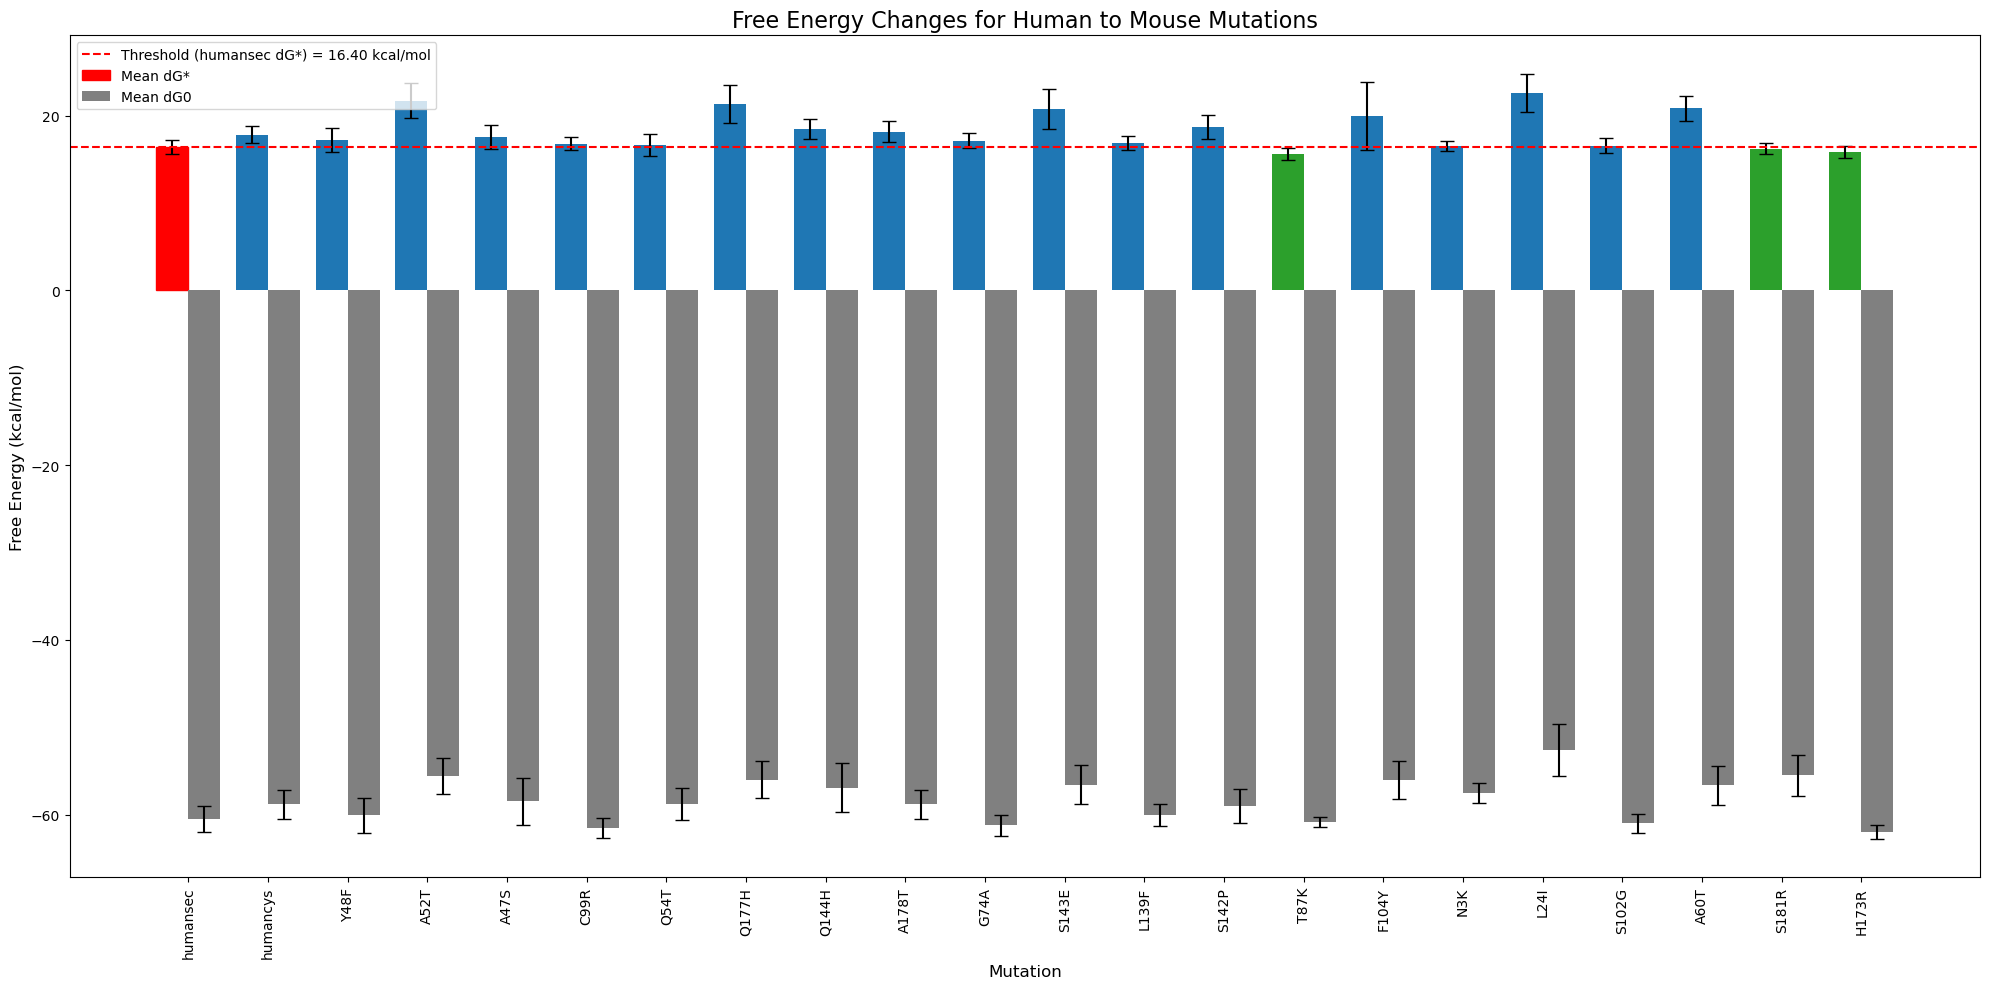

In [10]:
import re
import numpy as np
import matplotlib.pyplot as plt

# LaTeX table with free energy values
latex_table = r"""
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
Mutation & Mean dG* & Mean dG0 \\
\hline
humansec & 16.40 \pm 0.83 kcal/mol & -60.52 \pm 1.46 kcal/mol \\
\hline
humancys & 17.83 \pm 0.97 kcal/mol & -58.83 \pm 1.68 kcal/mol \\
\hline
Y48F & 17.25 \pm 1.38 kcal/mol & -60.09 \pm 2.00 kcal/mol \\
\hline
A52T & 21.73 \pm 1.99 kcal/mol & -55.61 \pm 2.03 kcal/mol \\
\hline
A47S & 17.55 \pm 1.37 kcal/mol & -58.48 \pm 2.71 kcal/mol \\
\hline
C99R & 16.80 \pm 0.78 kcal/mol & -61.57 \pm 1.12 kcal/mol \\
\hline
Q54T & 16.64 \pm 1.28 kcal/mol & -58.79 \pm 1.84 kcal/mol \\
\hline
Q177H & 21.33 \pm 2.17 kcal/mol & -55.99 \pm 2.15 kcal/mol \\
\hline
Q144H & 18.47 \pm 1.20 kcal/mol & -56.95 \pm 2.80 kcal/mol \\
\hline
A178T & 18.18 \pm 1.16 kcal/mol & -58.83 \pm 1.68 kcal/mol \\
\hline
G74A & 17.11 \pm 0.86 kcal/mol & -61.25 \pm 1.17 kcal/mol \\
\hline
S143E & 20.72 \pm 2.27 kcal/mol & -56.57 \pm 2.20 kcal/mol \\
\hline
L139F & 16.86 \pm 0.75 kcal/mol & -60.03 \pm 1.26 kcal/mol \\
\hline
S142P & 18.72 \pm 1.34 kcal/mol & -59.02 \pm 1.95 kcal/mol \\
\hline
T87K & 15.61 \pm 0.69 kcal/mol & -60.85 \pm 0.58 kcal/mol \\
\hline
F104Y & 19.94 \pm 3.88 kcal/mol & -56.06 \pm 2.18 kcal/mol \\
\hline
N3K & 16.51 \pm 0.53 kcal/mol & -57.49 \pm 1.15 kcal/mol \\
\hline
L24I & 22.62 \pm 2.19 kcal/mol & -52.62 \pm 2.95 kcal/mol \\
\hline
S102G & 16.56 \pm 0.87 kcal/mol & -61.01 \pm 1.12 kcal/mol \\
\hline
A60T & 20.84 \pm 1.45 kcal/mol & -56.66 \pm 2.26 kcal/mol \\
\hline
S181R & 16.19 \pm 0.63 kcal/mol & -55.53 \pm 2.34 kcal/mol \\
\hline
H173R & 15.85 \pm 0.71 kcal/mol & -61.97 \pm 0.81 kcal/mol \\
\end{tabular}
\caption{Combined Free Energy Changes}
\end{table}
"""

# Regex pattern to extract mutation data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9]+)\s*&\s*(?P<dg_star>[\d.]+|nan)\s*\\pm\s*(?P<dg_star_error>[\d.]+|nan)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+|nan)\s*\\pm\s*(?P<dg0_error>[\d.]+|nan)\s*kcal/mol"
)

# Extracting data
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

matches = pattern.findall(latex_table)
for match in matches:
    mutation, dg_star, dg_star_error, dg0, dg0_error = match

    mutations.append(mutation)
    dg_star_values.append(float(dg_star) if dg_star != "nan" else np.nan)
    dg_star_errors.append(float(dg_star_error) if dg_star_error != "nan" else np.nan)
    dg0_values.append(float(dg0) if dg0 != "nan" else np.nan)
    dg0_errors.append(float(dg0_error) if dg0_error != "nan" else np.nan)

# Determine the threshold dG* value using "humansec"
humansec_dg_star = None
for i, mut in enumerate(mutations):
    if mut == "humansec":
        humansec_dg_star = dg_star_values[i]
        break

# Ensure we have a threshold
if humansec_dg_star is None:
    humansec_dg_star = 16.40  # Default value

# Color mutations based on dG* threshold
colors = ['#2ca02c' if dg_star < humansec_dg_star else '#1f77b4' for dg_star in dg_star_values]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight humansec in red
humansec_index = mutations.index("humansec")
bars1[humansec_index].set_color('red')

# Annotate humansec threshold
ax.axhline(humansec_dg_star, color='red', linestyle='--', label=f'Threshold (humansec dG*) = {humansec_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Human to Mouse Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Save the figure
output_path = "/home/hp/nayanika/github/GPX6/figures/humansec_0_barplot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {output_path}")

# Adjust layout
plt.tight_layout()
plt.show()

Plot saved to /home/hp/nayanika/github/GPX6/figures/humansec_1_barplot.png
Plotting 20 mutations


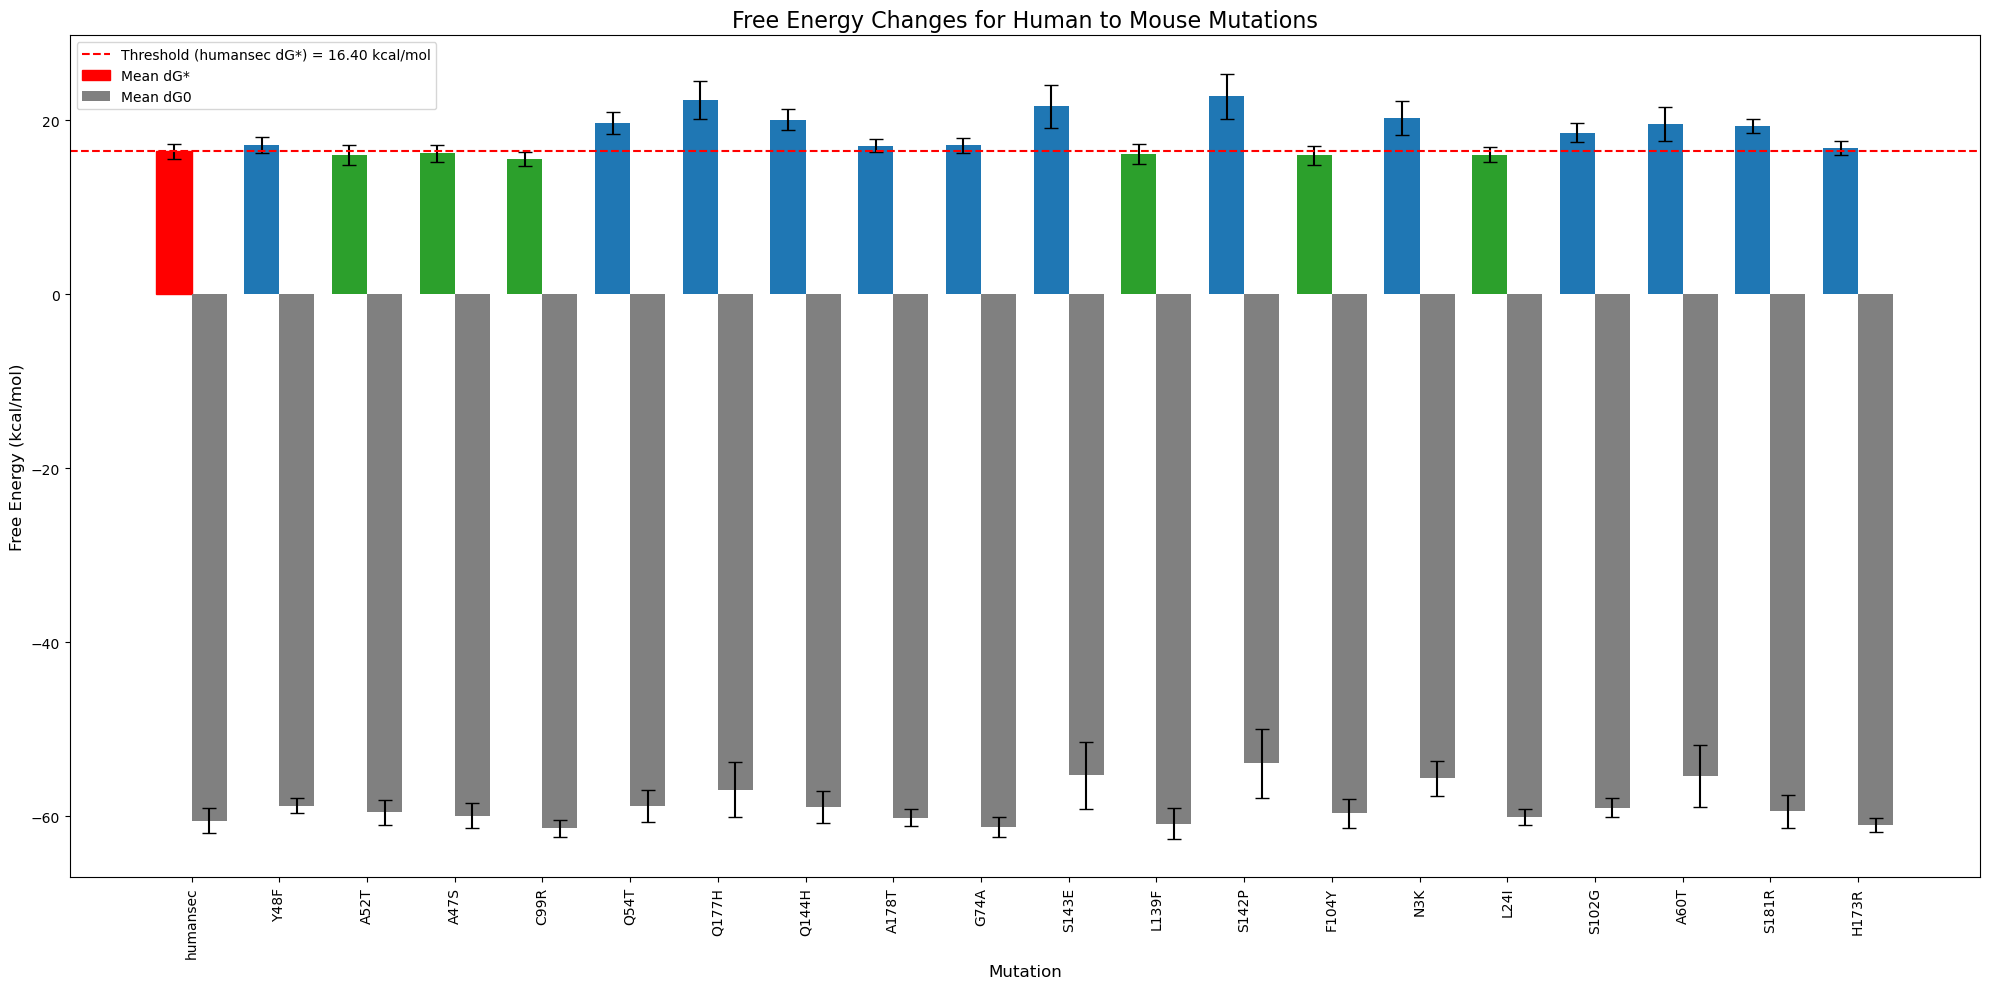

In [11]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Corrected LaTeX table
latex_table = r"""
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
Mutation & Mean dG* & Mean dG0 \\
\hline
humansec & 16.40 ± 0.83 kcal/mol & -60.52 ± 1.46 kcal/mol \\
\hline
Y48F & 17.10 ± 0.91 kcal/mol & -58.78 ± 0.86 kcal/mol \\
\hline
A52T & 16.00 ± 1.12 kcal/mol & -59.57 ± 1.46 kcal/mol \\
\hline
A47S & 16.18 ± 0.94 kcal/mol & -59.93 ± 1.42 kcal/mol \\
\hline
C99R & 15.55 ± 0.79 kcal/mol & -61.40 ± 0.94 kcal/mol \\
\hline
Q54T & 19.64 ± 1.28 kcal/mol & -58.79 ± 1.84 kcal/mol \\
\hline
Q177H & 22.33 ± 2.17 kcal/mol & -56.94 ± 3.15 kcal/mol \\
\hline
Q144H & 20.03 ± 1.20 kcal/mol & -58.95 ± 1.80 kcal/mol \\
\hline
A178T & 17.07 ± 0.78 kcal/mol & -60.16 ± 1.01 kcal/mol \\
\hline
G74A & 17.11 ± 0.86 kcal/mol & -61.25 ± 1.17 kcal/mol \\
\hline
S143E & 21.59 ± 2.49 kcal/mol & -55.29 ± 3.84 kcal/mol \\
\hline
L139F & 16.13 ± 1.17 kcal/mol & -60.84 ± 1.76 kcal/mol \\
\hline
S142P & 22.72 ± 2.63 kcal/mol & -53.93 ± 3.93 kcal/mol \\
\hline
F104Y & 15.95 ± 1.09 kcal/mol & -59.67 ± 1.65 kcal/mol \\
\hline
N3K & 20.24 ± 2.00 kcal/mol & -55.64 ± 2.03 kcal/mol \\
\hline
L24I & 16.04 ± 0.90 kcal/mol & -60.10 ± 0.94 kcal/mol \\
\hline
S102G & 18.56 ± 1.07 kcal/mol & -59.01 ± 1.12 kcal/mol \\
\hline
A60T & 19.57 ± 1.96 kcal/mol & -55.38 ± 3.56 kcal/mol \\
\hline
S181R & 19.34 ± 0.79 kcal/mol & -59.44 ± 1.89 kcal/mol \\
\hline
H173R & 16.82 ± 0.79 kcal/mol & -60.97 ± 0.81 kcal/mol \\
\end{tabular}
\caption{Combined Free Energy Changes}
\end{table}
"""

# Regex pattern to extract mutation data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9]+)\s*&\s*(?P<dg_star>[-\d.]+|nan)\s*±\s*(?P<dg_star_error>[\d.]+|nan)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+|nan)\s*±\s*(?P<dg0_error>[\d.]+|nan)\s*kcal/mol"
)

# Extracting data
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

matches = pattern.findall(latex_table)
for match in matches:
    mutation, dg_star, dg_star_error, dg0, dg0_error = match

    mutations.append(mutation)
    dg_star_values.append(float(dg_star) if dg_star != "nan" else np.nan)
    dg_star_errors.append(float(dg_star_error) if dg_star_error != "nan" else np.nan)
    dg0_values.append(float(dg0) if dg0 != "nan" else np.nan)
    dg0_errors.append(float(dg0_error) if dg0_error != "nan" else np.nan)

# Determine the threshold dG* value using "humansec"
humansec_dg_star = None
for i, mut in enumerate(mutations):
    if mut == "humansec":
        humansec_dg_star = dg_star_values[i]
        break

# Ensure we have a threshold
if humansec_dg_star is None:
    humansec_dg_star = 16.40  # Default value

# Handle missing values in coloring
colors = [
    '#2ca02c' if (not np.isnan(dg_star) and dg_star < humansec_dg_star) else '#1f77b4' 
    for dg_star in dg_star_values
]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight humansec in red
humansec_index = mutations.index("humansec")
bars1[humansec_index].set_color('red')

# Annotate humansec threshold
ax.axhline(humansec_dg_star, color='red', linestyle='--', label=f'Threshold (humansec dG*) = {humansec_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Human to Mouse Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Save the figure
output_path = "/home/hp/nayanika/github/GPX6/figures/humansec_1_barplot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {output_path}")

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Adjust layout
plt.tight_layout()
plt.show()


Plotting 19 mutations
Plot saved to /home/hp/nayanika/github/GPX6/figures/humansec_2_barplot.png


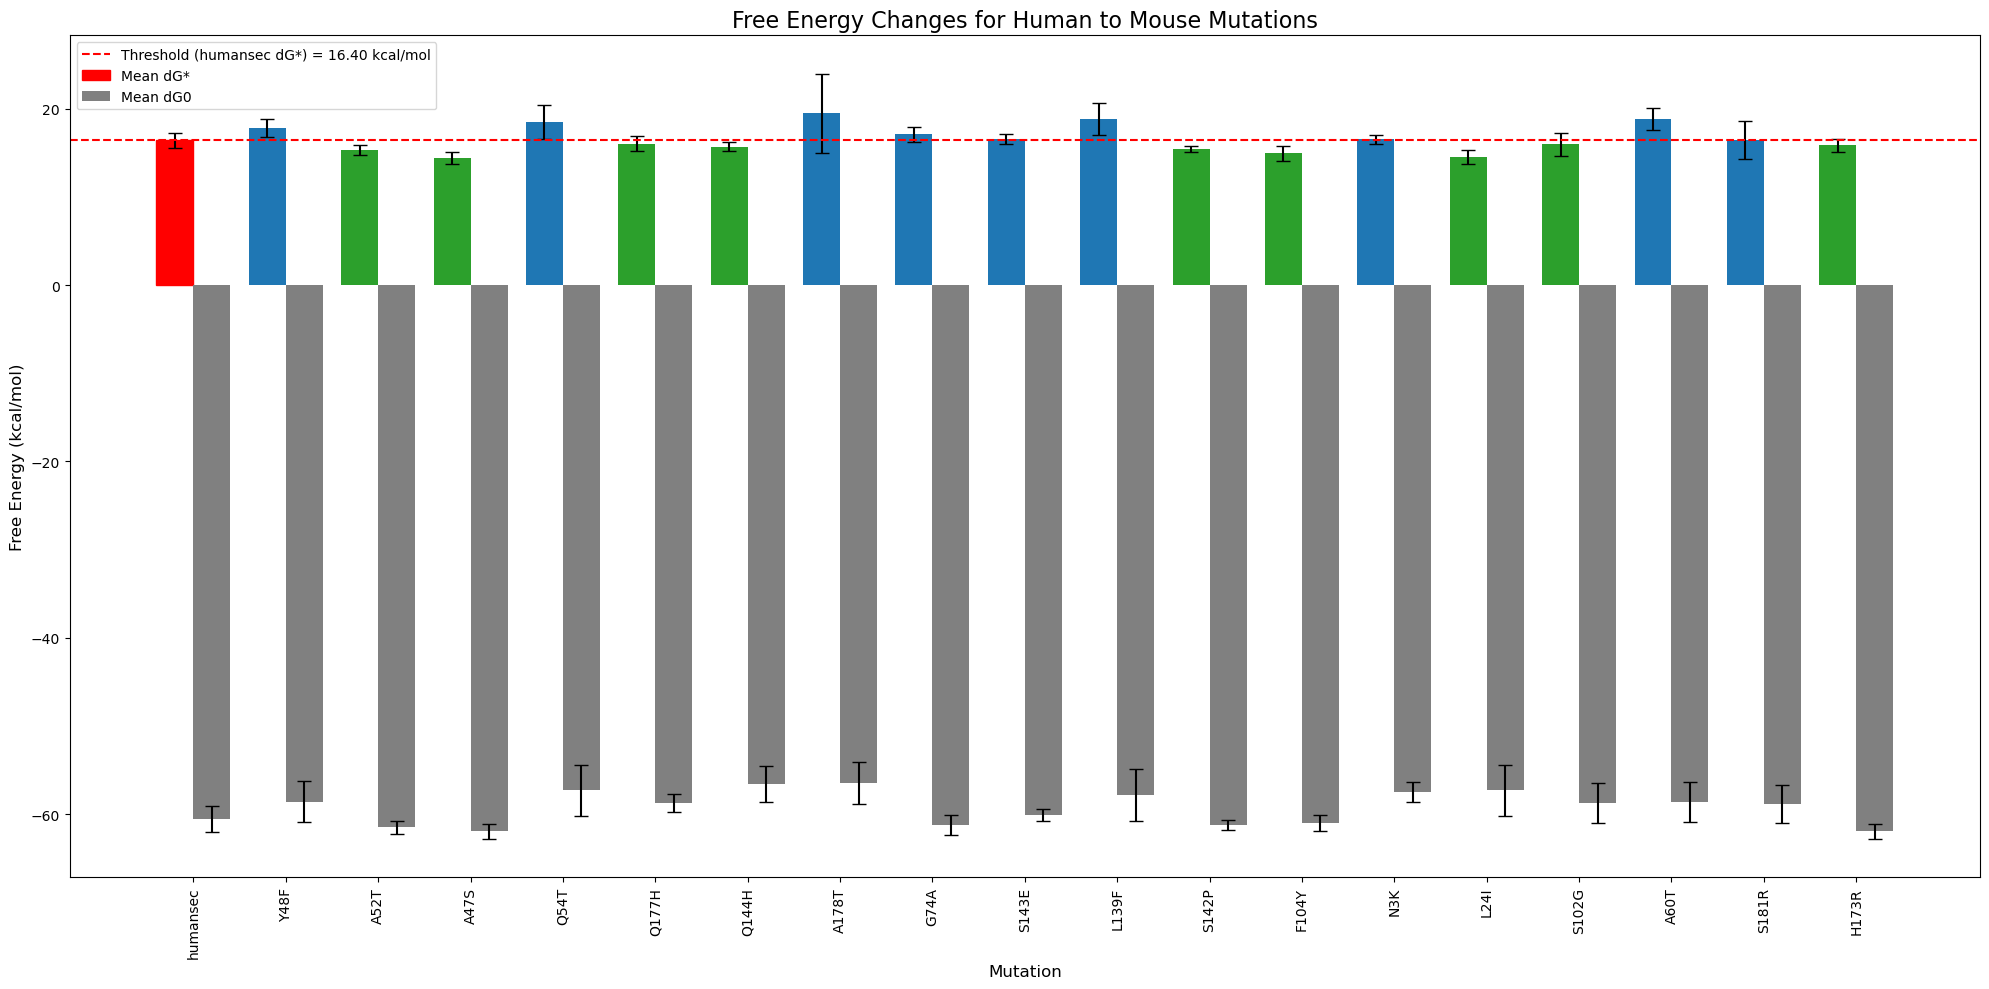

In [12]:
import re
import numpy as np
import matplotlib.pyplot as plt

# LaTeX table with free energy values
latex_table = r"""
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
Mutation & Mean dG* & Mean dG0 \\
\hline
humansec & 16.40 \pm 0.83 kcal/mol & -60.52 \pm 1.46 kcal/mol \\
\hline
Y48F & 17.82 \pm 1.04 kcal/mol & -58.59 \pm 2.32 kcal/mol \\
\hline
A52T & 15.33 \pm 0.54 kcal/mol & -61.50 \pm 0.76 kcal/mol \\
\hline
A47S & 14.42 \pm 0.69 kcal/mol & -61.97 \pm 0.84 kcal/mol \\
\hline
Q54T & 18.49 \pm 1.91 kcal/mol & -57.30 \pm 2.87 kcal/mol \\
\hline
Q177H & 16.05 \pm 0.89 kcal/mol & -58.75 \pm 1.06 kcal/mol \\
\hline
Q144H & 15.70 \pm 0.55 kcal/mol & -56.57 \pm 2.06 kcal/mol \\
\hline
A178T & 19.46 \pm 4.52 kcal/mol & -56.47 \pm 2.42 kcal/mol \\
\hline
G74A & 17.11 \pm 0.86 kcal/mol & -61.25 \pm 1.17 kcal/mol \\
\hline
S143E & 16.57 \pm 0.61 kcal/mol & -60.12 \pm 0.67 kcal/mol \\
\hline
L139F & 18.82 \pm 1.86 kcal/mol & -57.84 \pm 2.98 kcal/mol \\
\hline
S142P & 15.41 \pm 0.33 kcal/mol & -61.25 \pm 0.57 kcal/mol \\
\hline
F104Y & 14.92 \pm 0.87 kcal/mol & -61.01 \pm 0.92 kcal/mol \\
\hline
N3K & 16.51 \pm 0.53 kcal/mol & -57.49 \pm 1.15 kcal/mol \\
\hline
L24I & 14.51 \pm 0.80 kcal/mol & -57.31 \pm 2.93 kcal/mol \\
\hline
S102G & 15.95 \pm 1.34 kcal/mol & -58.74 \pm 2.24 kcal/mol \\
\hline
A60T & 18.84 \pm 1.25 kcal/mol & -58.66 \pm 2.26 kcal/mol \\
\hline
S181R & 16.44 \pm 2.15 kcal/mol & -58.87 \pm 2.19 kcal/mol \\
\hline
H173R & 15.85 \pm 0.71 kcal/mol & -61.97 \pm 0.81 kcal/mol \\
\hline
\end{tabular}
\caption{Combined Free Energy Changes}
\end{table}
\end{document}
"""

# Regex pattern to extract mutation data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9]+)\s*&\s*(?P<dg_star>[\d.]+|nan)\s*\\pm\s*(?P<dg_star_error>[\d.]+|nan)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+|nan)\s*\\pm\s*(?P<dg0_error>[\d.]+|nan)\s*kcal/mol"
)

# Extracting data
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

matches = pattern.findall(latex_table)
for match in matches:
    mutation, dg_star, dg_star_error, dg0, dg0_error = match

    mutations.append(mutation)
    dg_star_values.append(float(dg_star) if dg_star != "nan" else np.nan)
    dg_star_errors.append(float(dg_star_error) if dg_star_error != "nan" else np.nan)
    dg0_values.append(float(dg0) if dg0 != "nan" else np.nan)
    dg0_errors.append(float(dg0_error) if dg0_error != "nan" else np.nan)

# Determine the threshold dG* value using "humansec"
humansec_dg_star = None
for i, mut in enumerate(mutations):
    if mut == "humansec":
        humansec_dg_star = dg_star_values[i]
        break

# Ensure we have a threshold
if humansec_dg_star is None:
    humansec_dg_star = 16.40  # Default value

# Color mutations based on dG* threshold
colors = ['#2ca02c' if dg_star < humansec_dg_star else '#1f77b4' for dg_star in dg_star_values]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight humansec in red
humansec_index = mutations.index("humansec")
bars1[humansec_index].set_color('red')

# Annotate humansec threshold
ax.axhline(humansec_dg_star, color='red', linestyle='--', label=f'Threshold (humansec dG*) = {humansec_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Human to Mouse Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Save the figure
output_path = "/home/hp/nayanika/github/GPX6/figures/humansec_2_barplot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {output_path}")

# Adjust layout
plt.tight_layout()
plt.show()

Plotting 18 mutations
Plot saved to /home/hp/nayanika/github/GPX6/figures/humansec_3_barplot.png


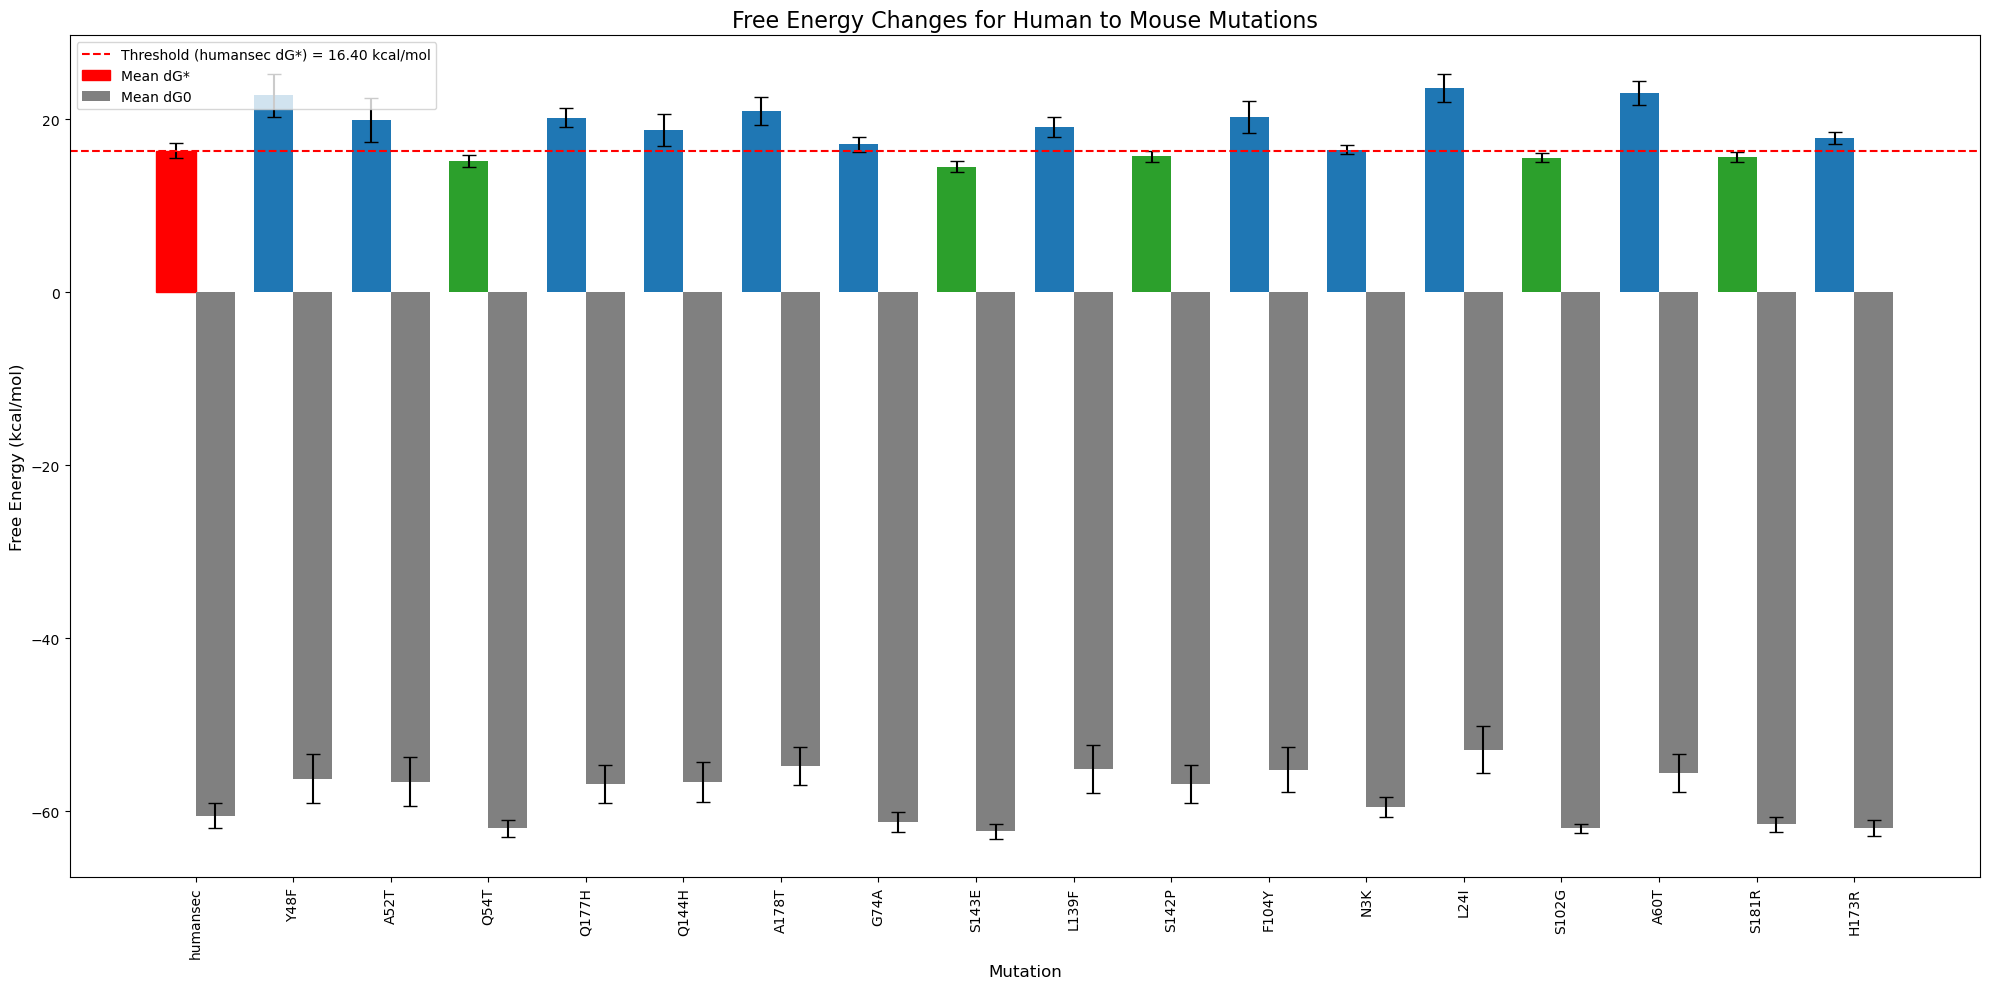

In [13]:
import re
import numpy as np
import matplotlib.pyplot as plt

# LaTeX table with free energy values
latex_table = r"""
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
Mutation & Mean dG* & Mean dG0 \\
\hline
humansec & 16.40 \pm 0.83 kcal/mol & -60.52 \pm 1.46 kcal/mol \\
\hline
Y48F & 22.78 \pm 2.52 kcal/mol & -56.27 \pm 2.84 kcal/mol \\
\hline
A52T & 19.88 \pm 2.54 kcal/mol & -56.57 \pm 2.85 kcal/mol \\
\hline
Q54T & 15.17 \pm 0.67 kcal/mol & -61.99 \pm 1.00 kcal/mol \\
\hline
Q177H & 20.19 \pm 1.12 kcal/mol & -56.82 \pm 2.20 kcal/mol \\
\hline
Q144H & 18.75 \pm 1.86 kcal/mol & -56.64 \pm 2.30 kcal/mol \\
\hline
A178T & 21.03 \pm 1.62 kcal/mol & -54.74 \pm 2.19 kcal/mol \\
\hline
G74A & 17.11 \pm 0.86 kcal/mol & -61.25 \pm 1.17 kcal/mol \\
\hline
S143E & 14.53 \pm 0.61 kcal/mol & -62.33 \pm 0.87 kcal/mol \\
\hline
L139F & 19.15 \pm 1.17 kcal/mol & -55.14 \pm 2.80 kcal/mol \\
\hline
S142P & 15.72 \pm 0.59 kcal/mol & -56.85 \pm 2.17 kcal/mol \\
\hline
F104Y & 20.33 \pm 1.85 kcal/mol & -55.20 \pm 2.59 kcal/mol \\
\hline
N3K & 16.51 \pm 0.53 kcal/mol & -59.49 \pm 1.15 kcal/mol \\
\hline
L24I & 23.61 \pm 1.61 kcal/mol & -52.89 \pm 2.72 kcal/mol \\
\hline
S102G & 15.59 \pm 0.50 kcal/mol & -61.98 \pm 0.53 kcal/mol \\
\hline
A60T & 23.09 \pm 1.38 kcal/mol & -55.58 \pm 2.23 kcal/mol \\
\hline
S181R & 15.66 \pm 0.58 kcal/mol & -61.54 \pm 0.89 kcal/mol \\
\hline
H173R & 17.85 \pm 0.71 kcal/mol & -61.97 \pm 0.90 kcal/mol \\
\hline
\end{tabular}
\caption{Combined Free Energy Changes}
\end{table}
\end{document}
"""

# Regex pattern to extract mutation data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9]+)\s*&\s*(?P<dg_star>[\d.]+|nan)\s*\\pm\s*(?P<dg_star_error>[\d.]+|nan)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+|nan)\s*\\pm\s*(?P<dg0_error>[\d.]+|nan)\s*kcal/mol"
)

# Extracting data
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

matches = pattern.findall(latex_table)
for match in matches:
    mutation, dg_star, dg_star_error, dg0, dg0_error = match

    mutations.append(mutation)
    dg_star_values.append(float(dg_star) if dg_star != "nan" else np.nan)
    dg_star_errors.append(float(dg_star_error) if dg_star_error != "nan" else np.nan)
    dg0_values.append(float(dg0) if dg0 != "nan" else np.nan)
    dg0_errors.append(float(dg0_error) if dg0_error != "nan" else np.nan)

# Determine the threshold dG* value using "humansec"
humansec_dg_star = None
for i, mut in enumerate(mutations):
    if mut == "humansec":
        humansec_dg_star = dg_star_values[i]
        break

# Ensure we have a threshold
if humansec_dg_star is None:
    humansec_dg_star = 16.40  # Default value

# Color mutations based on dG* threshold
colors = ['#2ca02c' if dg_star < humansec_dg_star else '#1f77b4' for dg_star in dg_star_values]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight humansec in red
humansec_index = mutations.index("humansec")
bars1[humansec_index].set_color('red')

# Annotate humansec threshold
ax.axhline(humansec_dg_star, color='red', linestyle='--', label=f'Threshold (humansec dG*) = {humansec_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Human to Mouse Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Save the figure
output_path = "/home/hp/nayanika/github/GPX6/figures/humansec_3_barplot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {output_path}")

# Adjust layout
plt.tight_layout()
plt.show()

Plotting 17 mutations
Plot saved to /home/hp/nayanika/github/GPX6/figures/humansec_4_barplot.png


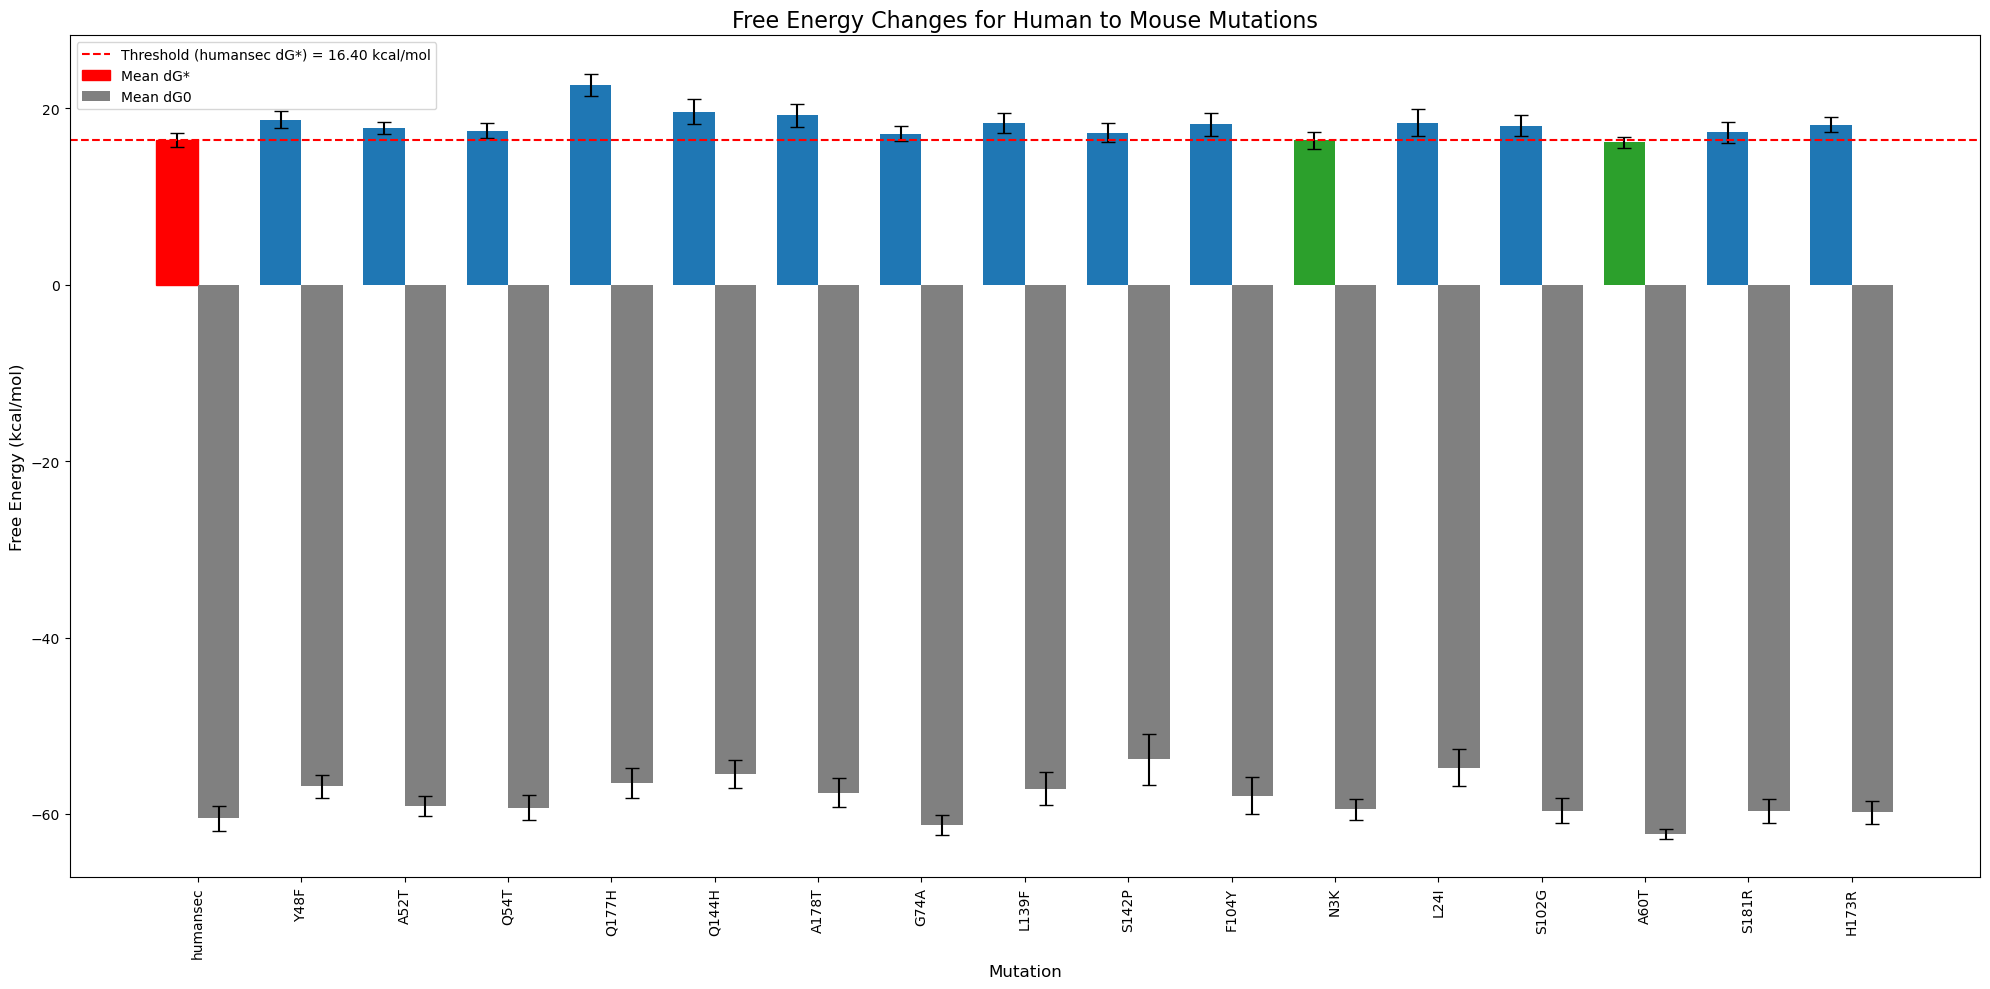

In [19]:
import re
import numpy as np
import matplotlib.pyplot as plt

# LaTeX table with free energy values
latex_table = r"""
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
Mutation & Mean dG* & Mean dG0 \\
\hline
humansec & 16.40 \pm 0.83 kcal/mol & -60.52 \pm 1.46 kcal/mol \\
\hline
Y48F & 18.72 \pm 0.97 kcal/mol & -56.89 \pm 1.34 kcal/mol \\
\hline
A52T & 17.78 \pm 0.70 kcal/mol & -59.08 \pm 1.13 kcal/mol \\
\hline
Q54T & 17.49 \pm 0.82 kcal/mol & -59.29 \pm 1.44 kcal/mol \\
\hline
Q177H & 22.68 \pm 1.27 kcal/mol & -56.45 \pm 1.70 kcal/mol \\
\hline
Q144H & 19.64 \pm 1.46 kcal/mol & -55.44 \pm 1.60 kcal/mol \\
\hline
A178T & 19.21 \pm 1.27 kcal/mol & -57.61 \pm 1.63 kcal/mol \\
\hline
G74A & 17.11 \pm 0.86 kcal/mol & -61.25 \pm 1.17 kcal/mol \\
\hline
L139F & 18.37 \pm 1.16 kcal/mol & -57.13 \pm 1.91 kcal/mol \\
\hline
S142P & 17.25 \pm 1.09 kcal/mol & -53.82 \pm 2.87 kcal/mol \\
\hline
F104Y & 18.20 \pm 1.33 kcal/mol & -57.92 \pm 2.11 kcal/mol \\
\hline
N3K & 16.38 \pm 0.99 kcal/mol & -59.49 \pm 1.15 kcal/mol \\
\hline
L24I & 18.36 \pm 1.54 kcal/mol & -54.78 \pm 2.09 kcal/mol \\
\hline
S102G & 18.03 \pm 1.17 kcal/mol & -59.67 \pm 1.42 kcal/mol \\
\hline
A60T & 16.14 \pm 0.63 kcal/mol & -62.27 \pm 0.56 kcal/mol \\
\hline
S181R & 17.28 \pm 1.15 kcal/mol & -59.66 \pm 1.32 kcal/mol \\
\hline
H173R & 18.14 \pm 0.84 kcal/mol & -59.83 \pm 1.34 kcal/mol \\
\hline
\end{tabular}
\caption{Combined Free Energy Changes}
\end{table}
\end{document}
"""

# Regex pattern to extract mutation data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9]+)\s*&\s*(?P<dg_star>[\d.]+|nan)\s*\\pm\s*(?P<dg_star_error>[\d.]+|nan)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+|nan)\s*\\pm\s*(?P<dg0_error>[\d.]+|nan)\s*kcal/mol"
)

# Extracting data
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

matches = pattern.findall(latex_table)
for match in matches:
    mutation, dg_star, dg_star_error, dg0, dg0_error = match

    mutations.append(mutation)
    dg_star_values.append(float(dg_star) if dg_star != "nan" else np.nan)
    dg_star_errors.append(float(dg_star_error) if dg_star_error != "nan" else np.nan)
    dg0_values.append(float(dg0) if dg0 != "nan" else np.nan)
    dg0_errors.append(float(dg0_error) if dg0_error != "nan" else np.nan)

# Determine the threshold dG* value using "humansec"
humansec_dg_star = None
for i, mut in enumerate(mutations):
    if mut == "humansec":
        humansec_dg_star = dg_star_values[i]
        break

# Ensure we have a threshold
if humansec_dg_star is None:
    humansec_dg_star = 16.40  # Default value

# Color mutations based on dG* threshold
colors = ['#2ca02c' if dg_star < humansec_dg_star else '#1f77b4' for dg_star in dg_star_values]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight humansec in red
humansec_index = mutations.index("humansec")
bars1[humansec_index].set_color('red')

# Annotate humansec threshold
ax.axhline(humansec_dg_star, color='red', linestyle='--', label=f'Threshold (humansec dG*) = {humansec_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Human to Mouse Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Save the figure
output_path = "/home/hp/nayanika/github/GPX6/figures/humansec_4_barplot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {output_path}")

# Adjust layout
plt.tight_layout()
plt.show()

Plotting 15 mutations
Plot saved to /home/hp/nayanika/github/GPX6/figures/humansec_5_barplot.png


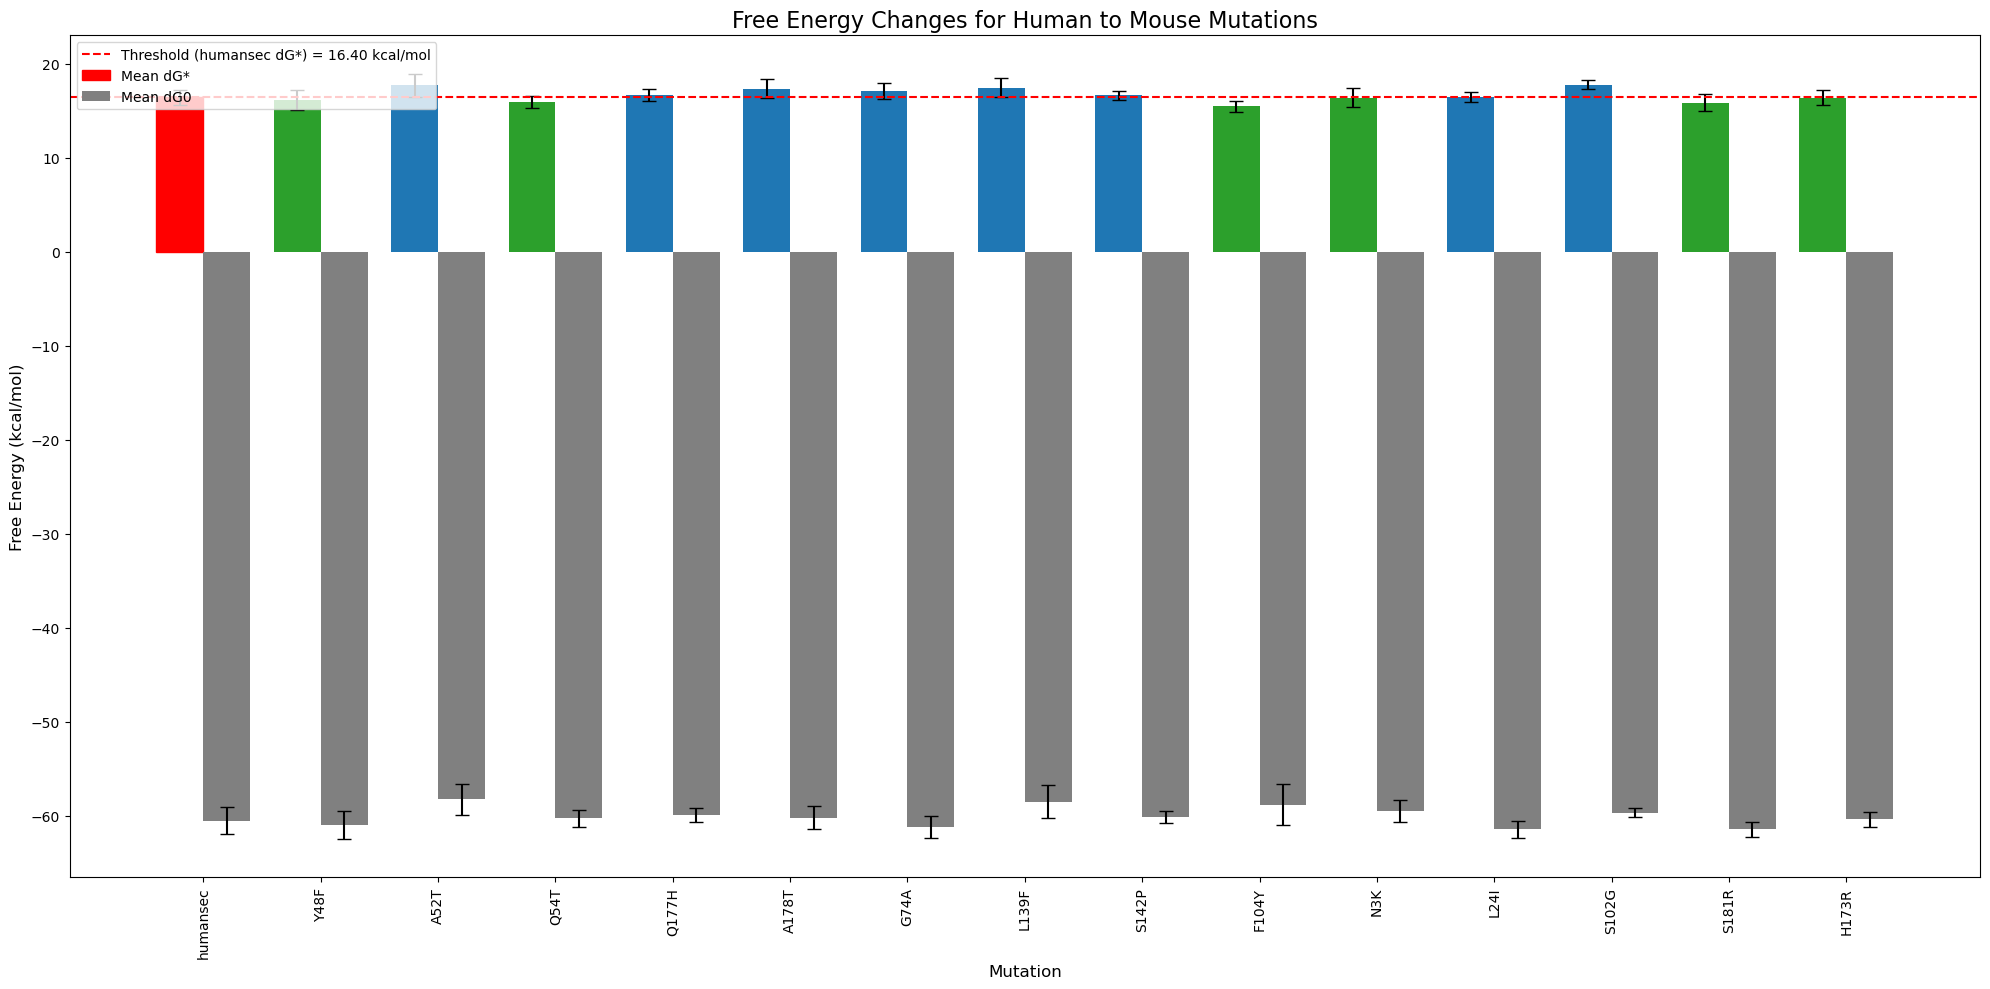

In [24]:
import re
import numpy as np
import matplotlib.pyplot as plt

# LaTeX table with free energy values
latex_table = r"""
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
Mutation & Mean dG* & Mean dG0 \\
\hline
humansec & 16.40 \pm 0.83 kcal/mol & -60.52 \pm 1.46 kcal/mol \\
\hline
Y48F & 16.08 \pm  1.07 kcal/mol & -60.99 \pm  1.48 kcal/mol \\
\hline
A52T & 17.70 \pm 1.23 kcal/mol & -58.26 \pm 1.65 kcal/mol \\
\hline
Q54T & 15.94 \pm 0.62 kcal/mol & -60.28 \pm 0.89 kcal/mol \\
\hline
Q177H & 16.66 \pm 0.65 kcal/mol & -59.92 \pm 0.77 kcal/mol \\
\hline
Q144H & 20.98 \pm 3.93 kcal/mol & -56.40 $\pm$ 4.13 kcal/mol \\
\hline
A178T & 17.32 \pm 0.99 kcal/mol & -60.24 \pm 1.21 kcal/mol \\
\hline
G74A & 17.11 \pm 0.86 kcal/mol & -61.25 \pm 1.17 kcal/mol \\
\hline
L139F & 17.43 \pm 1.03 kcal/mol & -58.53 \pm 1.74 kcal/mol \\
\hline
S142P & 16.61 \pm 0.49 kcal/mol & -60.17 \pm 0.65 kcal/mol \\
\hline
F104Y & 15.43 \pm 0.62 kcal/mol & -58.86 \pm 2.19 kcal/mol \\
\hline
N3K & 16.38 \pm 0.99 kcal/mol & -59.49 \pm 1.15 kcal/mol \\
\hline
L24I & 16.43 \pm 0.55 kcal/mol & -61.45 \pm 0.89 kcal/mol \\
\hline
S102G & 17.77 \pm 0.48 kcal/mol & -59.67 \pm 0.48 kcal/mol \\
\hline
S181R & 15.85 \pm 0.86 kcal/mol & -61.46 \pm 0.77 kcal/mol \\
\hline
H173R & 16.36 \pm 0.78 kcal/mol & -60.41 \pm 0.81 kcal/mol \\
\hline
\end{tabular}
\caption{Combined Free Energy Changes}
\end{table}
\end{document}
"""

# Regex pattern to extract mutation data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9]+)\s*&\s*(?P<dg_star>[\d.]+|nan)\s*\\pm\s*(?P<dg_star_error>[\d.]+|nan)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+|nan)\s*\\pm\s*(?P<dg0_error>[\d.]+|nan)\s*kcal/mol"
)

# Extracting data
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

matches = pattern.findall(latex_table)
for match in matches:
    mutation, dg_star, dg_star_error, dg0, dg0_error = match

    mutations.append(mutation)
    dg_star_values.append(float(dg_star) if dg_star != "nan" else np.nan)
    dg_star_errors.append(float(dg_star_error) if dg_star_error != "nan" else np.nan)
    dg0_values.append(float(dg0) if dg0 != "nan" else np.nan)
    dg0_errors.append(float(dg0_error) if dg0_error != "nan" else np.nan)

# Determine the threshold dG* value using "humansec"
humansec_dg_star = None
for i, mut in enumerate(mutations):
    if mut == "humansec":
        humansec_dg_star = dg_star_values[i]
        break

# Ensure we have a threshold
if humansec_dg_star is None:
    humansec_dg_star = 16.40  # Default value

# Color mutations based on dG* threshold
colors = ['#2ca02c' if dg_star < humansec_dg_star else '#1f77b4' for dg_star in dg_star_values]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight humansec in red
humansec_index = mutations.index("humansec")
bars1[humansec_index].set_color('red')

# Annotate humansec threshold
ax.axhline(humansec_dg_star, color='red', linestyle='--', label=f'Threshold (humansec dG*) = {humansec_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Human to Mouse Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Save the figure
output_path = "/home/hp/nayanika/github/GPX6/figures/humansec_5_barplot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {output_path}")

# Adjust layout
plt.tight_layout()
plt.show()